## European Basket Option Price 
Use Monte Carlo simulation to calculate a European basket option price where the payoff at expiry T is defined as

Payoff (T) = $\max(S_1(T) + S_2(T) - K, 0)$

The two Stock prices $S_1$ and $S_2$ follows correlated Geometric Brownian Motion:
    
$S_1(T) = S_1(0) \exp((r - \frac{1}{2}\sigma^2)T + \sigma B_T)$

$S_2(T) = S_2(0) \exp((r - \frac{1}{2}\sigma^2)T + \sigma W_T)$

Where 
$B_T = \sqrt{T} Z_1$, $W_T = \sqrt{T} Z_2$, $Z_1 \sim N(0,1)$, $Z_2 \sim N(0,1)$
$corr(Z_1, Z_2) = \rho$

Here
* $S_1(0) = S_2(0)$ = 100
* $K$ = 200
* $\sigma$ = 0.5
* $T = 1$
* $r$ = 0.05

Remember option price is the average discounted payoff:

$C = E[e^{-rT}\max(S_1(T) + S_2(T) - K, 0]$
calculate and plot the option prices for $\rho=-1,-0.8, -0.5, 0, 0.5, 0.8, 1$, and plot C as $\rho$ changes


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def basket_option(S_10, S_20, K, sigma, T, r, N_sim, rho):
    
    Z1 = np.random.randn(N_sim)
    Z3 = np.random.randn(N_sim) # standard normal sampling
    Z2 = rho * Z1 + np.sqrt(1 - (rho)**2) * Z3 # Your code here - please calculate Z2 based on Z1 and Z3 
                                               # (Z1 and Z3 are i.i.d normal random) using Cholesky decomposition to
                                               # simulate correlated normals
    
    S1 = S_10 * np.exp((r - 0.5 * (sigma**2)) * T + sigma * np.sqrt(T) * Z1)  # Your code here - please fill in the calculation code for S1 based on Z1
    S2 = S_20 * np.exp((r - 0.5 * (sigma**2)) * T + sigma * np.sqrt(T) * Z2)  # Your code here - please fill in the calculation code for S2 based on Z2
    
    option_prices = np.exp(-r*T) * np.where(S1 + S2 -K < 0, 0, S1 + S2 -K)  # Your Code here
    
    return np.mean(option_prices)

In [3]:
basket_option(100,100,200,0.5,1,0.05,10000,0.1)   # You should get something between  33 and 35

34.11657171807174

In [4]:
rho=[-1, -0.8,-0.5,0,0.5,0.8,1]
options=[]

In [5]:
for r in rho:
    option = basket_option(100,100,200,0.5,1,0.05,10000,r)
    options.append(option)

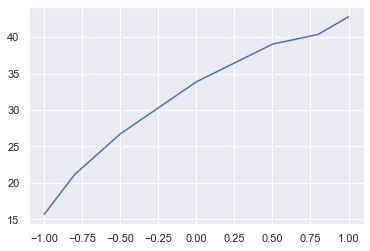

In [6]:
plt.plot(rho,options)